In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# memanggil dataset

In [13]:
data = pd.read_csv("bmw.csv")

In [5]:
# deskripsi dataset

In [14]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


<Axes: >

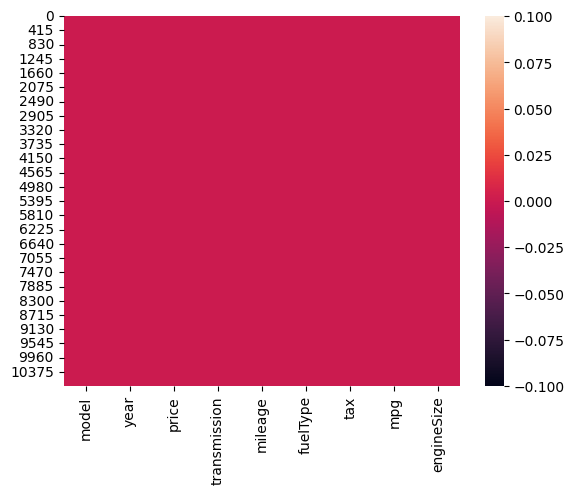

In [16]:
sns.heatmap(data.isnull())

In [17]:
# visualisasi data

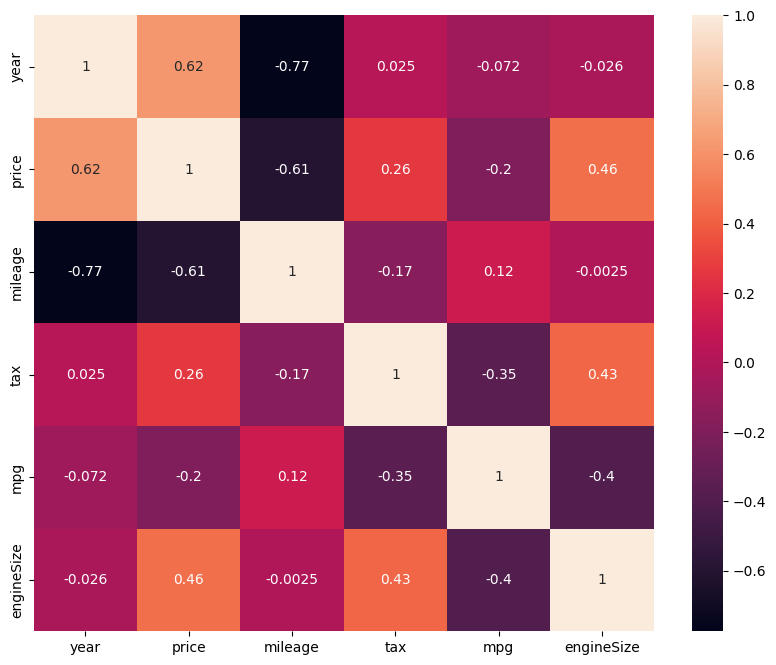

In [18]:
numeric_data = data.select_dtypes(include='number') #filter only numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(),annot=True)
plt.show()

In [ ]:
# jumlah mobil berdasarkan model

In [20]:
medels = data.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = data.rename(columns={'tax':'numberOfCars'})

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ' 5 Series'),
  Text(1, 0, ' 6 Series'),
  Text(2, 0, ' 1 Series'),
  Text(3, 0, ' 7 Series'),
  Text(4, 0, ' 2 Series'),
  Text(5, 0, ' 4 Series'),
  Text(6, 0, ' X3'),
  Text(7, 0, ' 3 Series'),
  Text(8, 0, ' X5'),
  Text(9, 0, ' X4'),
  Text(10, 0, ' i3'),
  Text(11, 0, ' X1'),
  Text(12, 0, ' M4'),
  Text(13, 0, ' X2'),
  Text(14, 0, ' X6'),
  Text(15, 0, ' 8 Series'),
  Text(16, 0, ' Z4'),
  Text(17, 0, ' X7'),
  Text(18, 0, ' M5'),
  Text(19, 0, ' i8'),
  Text(20, 0, ' M2'),
  Text(21, 0, ' M3'),
  Text(22, 0, ' M6'),
  Text(23, 0, ' Z3')])

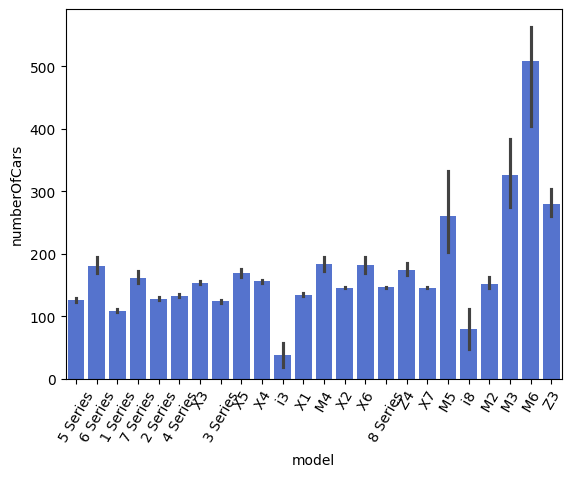

In [21]:
fig = plt.Figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'],color='royalblue')
plt.xticks(rotation=60)

In [ ]:
# ukuran mesin

In [13]:
engine = data.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

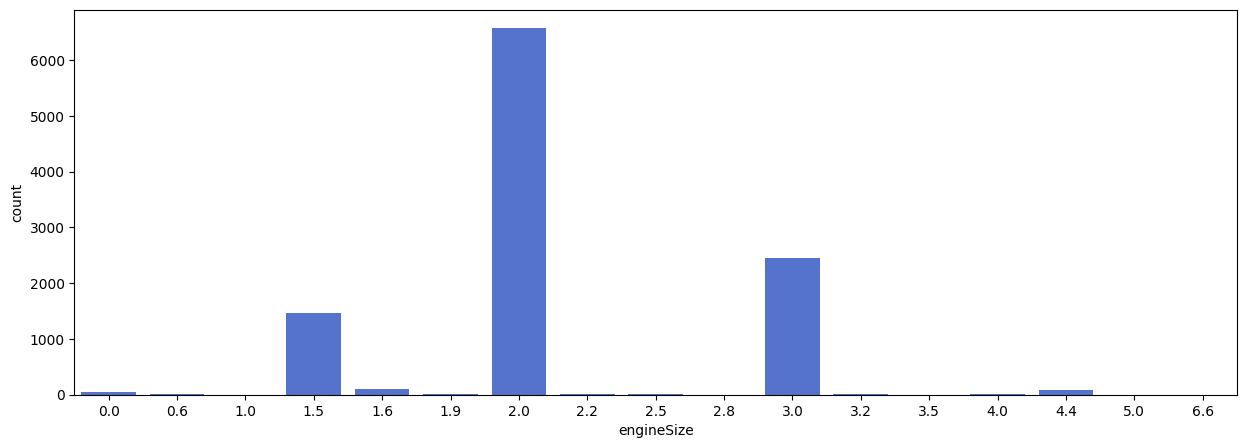

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

In [ ]:
# distribusi mileage

<Figure size 1500x500 with 0 Axes>

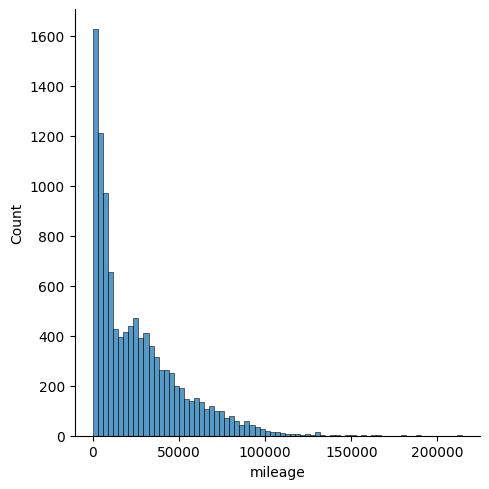

In [15]:
plt.figure(figsize=(15,5))
sns.displot(data['mileage'])

In [ ]:
# distribusi harga mobil

<Figure size 1500x500 with 0 Axes>

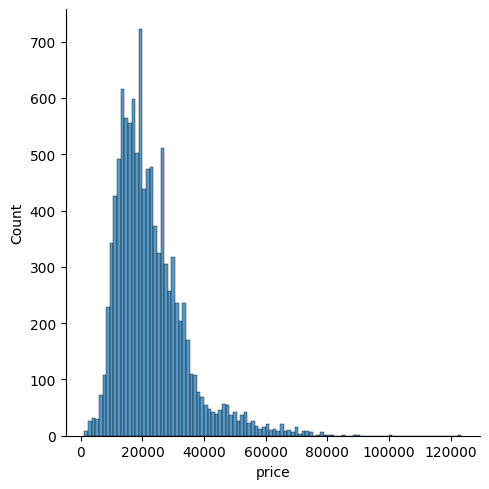

In [16]:
plt.figure(figsize=(15,5))
sns.displot(data['price'])

In [ ]:
# seleksi fitur

In [17]:
features = ['year','mileage','tax','mpg','engineSize']
x = data[features]
y = data['price']
x.shape, y.shape

((10781, 5), (10781,))

In [ ]:
# split data training

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(2696,)

In [ ]:
#membuat model regresi linear

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [20]:
score = lr.score(x_test, y_test)
print('akurasi model register linear', score)

akurasi model register linear 0.6560888451480963


In [ ]:
#membuat inputan model regresi linear

In [21]:
#year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2
input_data = np.array([[2019,400,145,30.2,2]])

prediction = lr.predict(input_data)
print('prediksi harga mobil dalam EUR :', prediction)

prediksi harga mobil dalam EUR : [27567.50851072]


c:\Users\asusa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#save model

In [ ]:
import pickle

filename = 'prediksi_mobil.sav'
pickle.dump(lr, open(filename, 'wb'))